<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

### Package Version
- tensorflow==2.3.0
- pandas==1.0.5
- numpy==1.18.5
- nltk==3.2.5
- matplotlib==3.2.2

# Text Summarization on WikiHow Dataset

### Dataset
WikiHow is a new large-scale dataset using the online WikiHow (http://www.wikihow.com/) knowledge base.

There are two features: - text: wikihow answers texts. - headline: bold lines as summary.

### Load the dataset
- Extract "wikihow-summarization.zip"
- Read "wikihowAll.csv"

In [2]:
!unzip "/content/drive/My Drive/NLP_Samsung/Text Summarization - NLP - Samsung/wikihow-summarization.zip"

Archive:  /content/drive/My Drive/NLP_Samsung/Text Summarization - NLP - Samsung/wikihow-summarization.zip
  inflating: wikihowAll.csv          


In [61]:
import pandas as pd
df = pd.read_csv('wikihowAll.csv')

In [62]:
df.head()

,headline,title,text
0,"\nKeep related supplies in the same area.,\nMa...",How to Be an Organized Artist1,"If you're a photographer, keep all the necess..."
1,\nCreate a sketch in the NeoPopRealist manner ...,How to Create a Neopoprealist Art Work,See the image for how this drawing develops s...
2,"\nGet a bachelor’s degree.,\nEnroll in a studi...",How to Be a Visual Effects Artist1,It is possible to become a VFX artist without...
3,\nStart with some experience or interest in ar...,How to Become an Art Investor,The best art investors do their research on t...
4,"\nKeep your reference materials, sketches, art...",How to Be an Organized Artist2,"As you start planning for a project or work, ..."


### Drop null values
- To preprocess the text we need to drop null values first

In [63]:
df = df.dropna()

## Preprocess text
Preprocess values of text & headline column

- Remove unwanted characters
- Convert text to lowercase
- Remove unwanted spaces
- Remove stopwords
- Replace empty strings with Null
- Drop null values from the dataframe

In [64]:
import re
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

def preprocess_text(df, column_name=''):

  # Select only alphabets
  df[column_name] = df[column_name].apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))

  # Convert text to lowercase
  df[column_name] = df[column_name].apply(lambda x: x.lower())

  # Strip unwanted spaces
  df[column_name] = df[column_name].apply(lambda x: x.strip())

  # Remove stopwords
  df[column_name] = df[column_name].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

  # Replace empty strings with Null
  df[column_name].replace('', np.nan, inplace = True)

  # Drop Null values
  df = df.dropna()

  return df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Use the `preprocess_text` function on text and headline column

In [65]:
df = preprocess_text(df, column_name='headline')
df = preprocess_text(df, column_name='text')

**Add START and END token at the beginning and end of the headline**

In [44]:
df['headline'] = df['headline'].apply(lambda x : 'sostok '+ x + ' eostok')

Print some rows from text and headline column

In [45]:
for i in range(5):
  print("Text:", df['text'][i])
  print("Headline:", df['headline'][i])
  print("\n")

Text: photographer keep necessary lens cords batteries quadrant home studio paints kept brushes cleaner canvas print supplies ink etc make broader groups areas supplies make finding easier limiting search much smaller area ideas include essential supplies area things use every day inspiration reference area dedicated work area infrequent secondary supplies area tucked way mean cleaning entire studio means keeping area immediately around desk easel pottery wheel etc clean night discard trash unnecessary materials wipe dirty surfaces endeavor leave workspace way sit next day start working immediately without work tidying even rest studio bit disorganized organized workspace help get business every time want make art visual people lot artist clutter comes desire keep track supplies visually instead tucked sight using jars old glasses vases cheap clear plastic drawers keep things sight without leaving strewn haphazardly ideas beyond mentioned include canvas shoe racks back door wine racks 

### Get length of each headline and text and add a column for that

In [46]:
df['len_headline'] = df['headline'].apply(lambda x: len(x.split(" ")))
df['len_text'] = df['text'].apply(lambda x: len(x.split(" ")))
df.head()

,headline,title,text,len_headline,len_text
0,sostok keep related supplies area make effort ...,How to Be an Organized Artist1,photographer keep necessary lens cords batteri...,61,332
1,sostok create sketch neopoprealist manner futu...,How to Create a Neopoprealist Art Work,see image drawing develops step step however i...,75,344
2,sostok get bachelor degree enroll studio based...,How to Be a Visual Effects Artist1,possible become vfx artist without college deg...,30,250
3,sostok start experience interest art understan...,How to Become an Art Investor,best art investors research pieces art buy som...,72,468
4,sostok keep reference materials sketches artic...,How to Be an Organized Artist2,start planning project work likely gathering s...,38,233


### Check the distribution of data
- This will help us in deciding maxlen

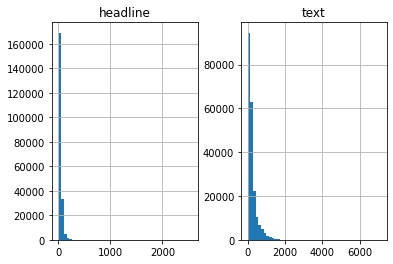

In [47]:
import matplotlib.pyplot as plt
text_word_count = []
headline_word_count = []

# populate the lists with sentence lengths
for i in df['text']:
  text_word_count.append(len(i.split()))

for i in df['headline']:
  headline_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'headline':headline_word_count})
length_df.hist(bins = 50)
plt.show()

Let's check the percentage of heading below 80 words

In [48]:
cnt=0
for i in df['headline']:
    if(len(i.split())<=80):
        cnt=cnt+1
print(cnt/len(df['headline']))

0.9306250298885754


Let's check the percentage of text below 80 words

In [49]:
cnt=0
for i in df['text']:
    if(len(i.split())<=600):
        cnt=cnt+1
print(cnt/len(df['text']))

0.9176701257711253


For reducing data, we'll take headings where length > 50 and text where length > 100

In [50]:
df = df[(df.len_headline > 50) & (df.len_text > 100)]

## Train test split

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.text, df.headline, test_size = 0.2, random_state=42)

del df

#### Print one sample

In [52]:
X_train[0]

'photographer keep necessary lens cords batteries quadrant home studio paints kept brushes cleaner canvas print supplies ink etc make broader groups areas supplies make finding easier limiting search much smaller area ideas include essential supplies area things use every day inspiration reference area dedicated work area infrequent secondary supplies area tucked way mean cleaning entire studio means keeping area immediately around desk easel pottery wheel etc clean night discard trash unnecessary materials wipe dirty surfaces endeavor leave workspace way sit next day start working immediately without work tidying even rest studio bit disorganized organized workspace help get business every time want make art visual people lot artist clutter comes desire keep track supplies visually instead tucked sight using jars old glasses vases cheap clear plastic drawers keep things sight without leaving strewn haphazardly ideas beyond mentioned include canvas shoe racks back door wine racks cups 

In [53]:
y_train[0]

'sostok keep related supplies area make effort clean dedicated workspace every session place loose supplies large clearly visible containers use clotheslines clips hang sketches photos reference material use every inch room storage especially vertical space use chalkboard paint make space drafting ideas right walls purchase label maker make organization strategy semi permanent make habit throwing old excess useless stuff month eostok'

### Initialize parameter values
- Set values for max_features, maxlen
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence

In [54]:
max_features = 10000
maxlen_headline = 50
maxlen_text = 100

### Apply `tensorflow.keras` Tokenizer and get indices for words
- Initialize Tokenizer object with number of words as 10000
- Fit different tokenizer objects on headline and text column
- Convert the text to sequence


In [55]:
from tensorflow.keras.preprocessing.text import Tokenizer

feature_tokenizer = Tokenizer(num_words=max_features)
feature_tokenizer.fit_on_texts(X_train)
X_train = feature_tokenizer.texts_to_sequences(X_train)
X_test = feature_tokenizer.texts_to_sequences(X_test)

print("Number of Samples in X_train:", len(X_train))       
print(X_train[0])

label_tokenizer = Tokenizer(num_words=max_features)
label_tokenizer.fit_on_texts(y_train)
y_train = label_tokenizer.texts_to_sequences(y_train)
y_test = label_tokenizer.texts_to_sequences(y_test)

print("Number of Samples in y_train:", len(y_train))       
print(y_train[0])

Number of Samples in X_train: 25312
[2528, 797, 1846, 1506, 2686, 2145, 2333, 6460, 585, 1547, 7071, 48, 196, 728, 3405, 719, 1575, 2145, 2218, 3144, 51, 689, 2333, 6460, 82, 45, 2606, 51, 585, 309, 585, 82, 1547, 51, 453, 1108, 579, 317, 40, 1547, 432, 436, 7071, 82, 585, 585, 1555, 5160, 3826, 46, 3, 889, 451, 3655, 52, 2014, 282, 2288, 1992, 1474, 4, 887, 3298, 115, 1563, 1285, 3890, 2014, 151, 279, 410, 1475, 66, 1982, 29, 93, 1089, 1474, 11, 7, 410, 29, 460, 3391, 6683, 1718, 663, 3234, 1315, 663, 490, 15, 1817, 3187, 11, 84, 169, 453, 1579, 440, 1470, 3533, 1806, 728, 196, 8500, 55, 8919, 2949, 2949, 579, 8919, 579, 987, 1447, 8919, 2949, 1727, 29, 2949, 32, 1557, 243, 8919, 32, 59, 64, 85, 663, 1353, 32, 882, 5891, 2949, 1727, 1098, 2949, 32, 2949, 103, 1557, 6099, 59, 64, 85, 663, 1353, 32, 882, 5891, 8919, 579, 1590, 23, 7964, 85, 579, 722, 579, 3132, 59, 579, 1618, 579, 8919, 579, 6, 7964, 722, 3056, 59, 8919, 987, 3482, 2606, 3449, 970, 359, 5347, 4, 390, 28, 93, 5347, 118, 

### Pad sequences
- Pad each example with a maximum length

In [56]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen = maxlen_text, padding='post')
X_test = pad_sequences(X_test, maxlen = maxlen_text, padding='post')

y_train = pad_sequences(y_train, maxlen = maxlen_headline, padding='post')
y_test = pad_sequences(y_test, maxlen = maxlen_headline, padding='post')

### Vocab mapping
- There is no word for 0th index

In [57]:
feature_tokenizer.word_index

{'may': 1,
 'make': 2,
 'use': 3,
 'also': 4,
 'need': 5,
 'one': 6,
 'get': 7,
 'time': 8,
 'like': 9,
 'want': 10,
 'help': 11,
 'sure': 12,
 'take': 13,
 'people': 14,
 'keep': 15,
 'try': 16,
 'good': 17,
 'work': 18,
 'find': 19,
 'even': 20,
 'water': 21,
 'might': 22,
 'way': 23,
 'look': 24,
 'go': 25,
 'see': 26,
 'well': 27,
 'example': 28,
 'back': 29,
 'using': 30,
 'place': 31,
 'first': 32,
 'two': 33,
 'many': 34,
 'know': 35,
 'new': 36,
 'feel': 37,
 'around': 38,
 'much': 39,
 'right': 40,
 'person': 41,
 'ask': 42,
 'day': 43,
 'give': 44,
 'start': 45,
 'best': 46,
 'could': 47,
 'important': 48,
 'something': 49,
 'things': 50,
 'top': 51,
 'different': 52,
 'add': 53,
 'long': 54,
 'include': 55,
 'information': 56,
 'hair': 57,
 'would': 58,
 'side': 59,
 'child': 60,
 'small': 61,
 'however': 62,
 'able': 63,
 'body': 64,
 'must': 65,
 'set': 66,
 'used': 67,
 'often': 68,
 'put': 69,
 'end': 70,
 'let': 71,
 'think': 72,
 'another': 73,
 'avoid': 74,
 'check': 

In [58]:
label_tokenizer.word_index

{'sostok': 1,
 'eostok': 2,
 'make': 3,
 'use': 4,
 'get': 5,
 'take': 6,
 'add': 7,
 'find': 8,
 'click': 9,
 'place': 10,
 'one': 11,
 'water': 12,
 'time': 13,
 'keep': 14,
 'consider': 15,
 'look': 16,
 'go': 17,
 'choose': 18,
 'want': 19,
 'check': 20,
 'try': 21,
 'know': 22,
 'start': 23,
 'create': 24,
 'right': 25,
 'sure': 26,
 'set': 27,
 'select': 28,
 'new': 29,
 'using': 30,
 'remove': 31,
 'open': 32,
 'cut': 33,
 'back': 34,
 'like': 35,
 'top': 36,
 'ask': 37,
 'work': 38,
 'two': 39,
 'first': 40,
 'learn': 41,
 'avoid': 42,
 'need': 43,
 'put': 44,
 'around': 45,
 'hair': 46,
 'apply': 47,
 'good': 48,
 'understand': 49,
 'side': 50,
 'tap': 51,
 'decide': 52,
 'see': 53,
 'clean': 54,
 'determine': 55,
 'give': 56,
 'people': 57,
 'help': 58,
 'let': 59,
 'child': 60,
 'file': 61,
 'area': 62,
 'paper': 63,
 'enter': 64,
 'day': 65,
 'type': 66,
 'plan': 67,
 'dry': 68,
 'small': 69,
 'dog': 70,
 'turn': 71,
 'talk': 72,
 'prepare': 73,
 'may': 74,
 'write': 75,
 '

### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [59]:
num_words_text = len(feature_tokenizer.word_index) + 1
print(num_words_text)

num_words_headline = len(label_tokenizer.word_index) + 1
print(num_words_headline)

93834
46099


### Delete rows that contain only START and END token

In [60]:
ind=[]
for i in range(len(y_train)):
    cnt=0
    for j in y_train[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_train=np.delete(y_train,ind, axis=0)
X_train=np.delete(X_train,ind, axis=0)

ind=[]
for i in range(len(y_test)):
    cnt=0
    for j in y_test[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_test=np.delete(y_test,ind, axis=0)
X_test=np.delete(X_test,ind, axis=0)

### Define model
- We'll use encoded decoder model
- We'll use Attention layer from "https://github.com/thushv89/attention_keras"

In [28]:
!git clone "https://github.com/thushv89/attention_keras"

Cloning into 'attention_keras'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 212 (delta 40), reused 75 (delta 24), pack-reused 109
Receiving objects: 100% (212/212), 211.92 KiB | 8.15 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, TimeDistributed
from attention_keras.src.layers.attention import AttentionLayer

hidden_dim = 300
embedding_dim = 100

# Encoder
encoder_inputs = Input(shape=(maxlen_text, ))

# Embedding layer
enc_emb =  Embedding(num_words_text, embedding_dim, trainable=True)(encoder_inputs)

# Encoder lstm 1
encoder_lstm1 = LSTM(hidden_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# Encoder lstm 2
encoder_lstm2 = LSTM(hidden_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# Encoder lstm 3
encoder_lstm3 = LSTM(hidden_dim, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

# Embedding layer
dec_emb_layer = Embedding(num_words_headline, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(hidden_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# Dense layer
decoder_dense = TimeDistributed(Dense(num_words_headline, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Print model summary
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 100, 100)     9383400     input_5[0][0]                    
__________________________________________________________________________________________________
lstm_8 (LSTM)                   [(None, 100, 300), ( 481200      embedding_4[0][0]                
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

### Compile the model

In [26]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

Add Callbacks

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

### Fit the model
- Training will take some time

In [28]:
history = model.fit([X_train, y_train[:,:-1]], y_train.reshape(y_train.shape[0], y_train.shape[1], 1)[:,1:],
                    epochs=100, callbacks=[early_stopping], batch_size=128,
                    validation_data=([X_test, y_test[:,:-1]], y_test.reshape(y_test.shape[0], y_test.shape[1], 1)[:,1:]))

Epoch 1/100
198/198 [==============================] - 319s 2s/step - loss: 8.0130 - val_loss: 7.6972
Epoch 2/100
198/198 [==============================] - 318s 2s/step - loss: 7.5550 - val_loss: 7.3758
Epoch 3/100
198/198 [==============================] - 319s 2s/step - loss: 7.2479 - val_loss: 7.1160
Epoch 4/100
198/198 [==============================] - 318s 2s/step - loss: 7.0392 - val_loss: 6.9702
Epoch 5/100
198/198 [==============================] - 318s 2s/step - loss: 6.8840 - val_loss: 6.8679
Epoch 6/100
198/198 [==============================] - 326s 2s/step - loss: 6.7497 - val_loss: 6.7725
Epoch 7/100
198/198 [==============================] - 343s 2s/step - loss: 6.6302 - val_loss: 6.6897
Epoch 8/100
198/198 [==============================] - 345s 2s/step - loss: 6.5229 - val_loss: 6.6328
Epoch 9/100
198/198 [==============================] - 346s 2s/step - loss: 6.4254 - val_loss: 6.5887
Epoch 10/100
198/198 [==============================] - 344s 2s/step - loss: 6.335

### Plot the results

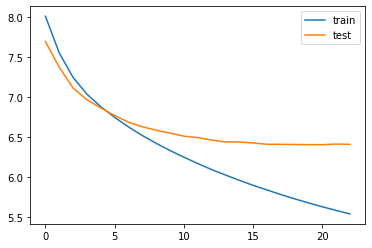

In [29]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### Dictionary to Convert Index to word

In [69]:
reverse_target_word_index = label_tokenizer.index_word
reverse_source_word_index = feature_tokenizer.index_word
target_word_index = label_tokenizer.word_index

### Inference
- Add inference for encoder-decoder

In [31]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(hidden_dim,))
decoder_state_input_c = Input(shape=(hidden_dim,))
decoder_hidden_state_input = Input(shape=(maxlen_text, hidden_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

Function to implement inference

In [71]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :]) + 2
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok' or len(decoded_sentence.split()) >= (maxlen_headline-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

### Load model
- Training will take lot of time, we have already trained a model on 23 epochs, 128 batch_size

In [66]:
from tensorflow.keras.models import load_model

encoder_model = load_model("/content/drive/My Drive/NLP_Samsung/Text Summarization - NLP - Samsung/encoder_model1.h5")
decoder_model = load_model("/content/drive/My Drive/NLP_Samsung/Text Summarization - NLP - Samsung/decoder_model1.h5", 
                           custom_objects={'AttentionLayer': AttentionLayer}, compile=False)

### Features to text
- Add functions to get text back from encoded text and headline

In [67]:
def seq2headline(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [72]:
for i in range(0,10):
    print("Text:",seq2text(X_train[i]))
    print("Original headline:", seq2headline(y_train[i]))
    print("Predicted headline:", decode_sequence(X_train[i].reshape(1, maxlen_text)))
    print("\n")

Text: trick basically extra half turn turn jump shoulders moving one half turns landing foot forward need pop lip extra air bit snap shoulders core compared backside much difficult completed heel edge harder pop toe edge going wall heel edge pop heel edge shoulders snapping around backside complete one half turns land back foot forward go jump good amount speed extra pop little board flatten give area pop jump much difficult make sure comfortable jumps attempting backside actually bit easier backside backside land switch meaning ready backside switch hit next jump backside switch hits quite difficult accomplish better try backside first 
Original headline: common terms know falling leaf practice carving turns able ride learn protect learn rules warm bit trying hike top pipe start top first time try go angle patient stay relaxed begin try slide turns allow get little air land properly start air try attempt try cab work try backside 
Predicted headline:  right possible add beginning spec